## 3D NumPy arrays

See the table to understand a simple analogy :

| Dimension |     | `.shape` example |
|---------- | --- |---------------   |
| 1D array |      | (3,) |
| 2D array |      | (2,3) :: (row, column) |
| 3D array |      | (2, 2, 3) :: (depth, row, column) |

So with **NumPy 3D arrays**, the first dimension value is the __depth__.

However, this changes a bit for handling images via Matplotlib.

In [3]:
a = np.arange(24).reshape((2,3,4))

a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [4]:
## access the first layer/channel

a[0]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [5]:
## access an element - 5

a[0][1][1]

5

In [6]:
## or, simply specify the indexes in this way :

a[0,1,1]

5

In [7]:
## access a row in `a` - [8,9,10,11]

a[0,2,:]

## a[0, 2] will also yield same result but it could become confusing to comprehend in this way

array([ 8,  9, 10, 11])

In [8]:
## example : Access only corner elements, in below 2D array

a = np.arange(9).reshape(3,3)
print(a)
print("-" * 10)

a[::2, ::2]

[[0 1 2]
 [3 4 5]
 [6 7 8]]
----------


array([[0, 2],
       [6, 8]])

In [10]:
## example : Access only corner elements (of each layer), in below 3D array

a = np.arange(24).reshape(2,3,4)
print(a)
print("-" * 10)

a[:, ::2, ::3]

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
----------


array([[[ 0,  3],
        [ 8, 11]],

       [[12, 15],
        [20, 23]]])

<br>

**Example :**

Let's take a 3x3 Rubik's cube analogy.

In [12]:
m = np.arange(1,28).reshape(3,3,3)
m

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]]])

In [14]:
## access all elements that fall in the middle column, in each channel

m[:, :, 1]

array([[ 2,  5,  8],
       [11, 14, 17],
       [20, 23, 26]])

In [15]:
## access all corner elements

m[::2, ::2, ::2]

array([[[ 1,  3],
        [ 7,  9]],

       [[19, 21],
        [25, 27]]])

In [16]:
## flatten out the Rubik's cube

m.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [22]:
print(np.sum(m))    ## sum of all values
print("-" * 10)

print(np.sum(a, axis=0))            ## sum along depth direction
print("-" * 10)

print(np.sum(a, axis=1))        ## sum along vartical diretion
print("-" * 10)

print(np.sum(a, axis=2))       ## sum along horizontal direction

378
----------
[[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]]
----------
[[12 15 18 21]
 [48 51 54 57]]
----------
[[ 6 22 38]
 [54 70 86]]


## Manipulating Images to understand 3D arrays

In [2]:
import matplotlib.pyplot as plt

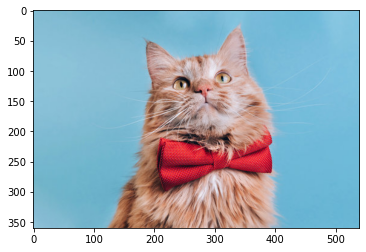

In [15]:
img_cat = plt.imread("./datasets/images/cat2_numpy.jpg")

plt.imshow(img_cat)

In [16]:
img_cat

## each inner array is a pixel, like - (Red, Green Blue)

array([[[130, 188, 210],
        [130, 188, 210],
        [130, 188, 210],
        ...,
        [127, 196, 227],
        [127, 196, 227],
        [127, 196, 227]],

       [[130, 188, 210],
        [130, 188, 210],
        [130, 188, 210],
        ...,
        [127, 196, 227],
        [127, 196, 227],
        [127, 196, 227]],

       [[130, 188, 210],
        [130, 188, 210],
        [130, 188, 210],
        ...,
        [127, 196, 227],
        [127, 196, 227],
        [127, 196, 227]],

       ...,

       [[149, 197, 220],
        [149, 197, 220],
        [149, 197, 220],
        ...,
        [108, 185, 215],
        [108, 185, 215],
        [108, 185, 215]],

       [[150, 196, 220],
        [150, 196, 220],
        [149, 197, 220],
        ...,
        [109, 184, 213],
        [109, 184, 213],
        [109, 184, 213]],

       [[151, 197, 221],
        [151, 197, 221],
        [149, 197, 220],
        ...,
        [108, 183, 212],
        [108, 183, 212],
        [108, 183, 212]]

In [17]:
img_cat.shape

(360, 540, 3)

Shape of a Matplotlib array is different from that of corresponding Numpy array. In Matplotlib, the `depth` dimension value appears at the end.

Hence in Matplotlib - `.shape` => __(rows, columns, channel)__  OR  an image's __(height, width, depth)__

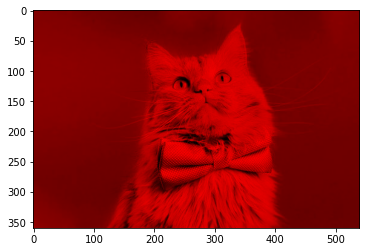

In [21]:
## Let's display only Red color pixels. In other words, convert the cat's image into a red color image

img_cat_red = img_cat.copy()

img_cat_red[:,:,(1,2)] = 0
## take all rows, take all columns, firstly take Blue and Green layers and convert them to 0.
## In this way, we'll only be left with non-zero Red layer.

plt.imshow(img_cat_red)

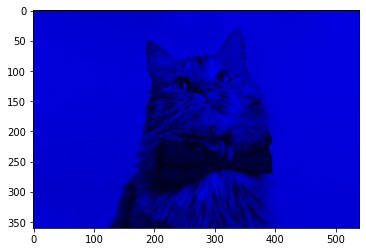

In [34]:
img_cat_blue = img_cat.copy()

img_cat_blue[:,:,(0,1)] = 0         ## make Red, Green = (0, 0). So only Blue would remain.

plt.imshow(img_cat_blue)

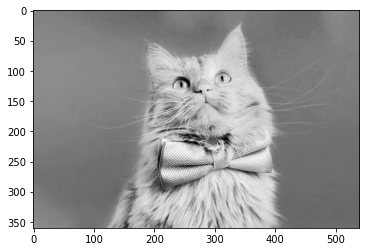

In [33]:
plt.imshow(img_cat[:,:,0], cmap="gray")

## here we're accessing - all rows, all columns, only 0-th channel ie. Red - meaning, only single depth
# this is a type of gray scale image

- ### Rotate Image

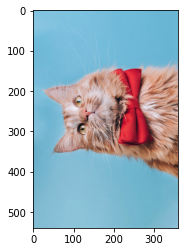

In [40]:
## 90 degree anti-clockwise rotation

plt.imshow(np.rot90(img_cat))

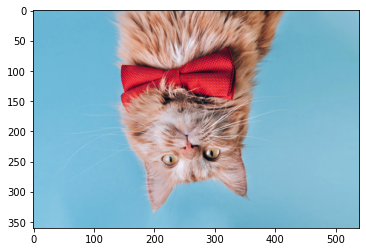

In [41]:
## inverted image

plt.imshow(np.rot90(img_cat, k=2))

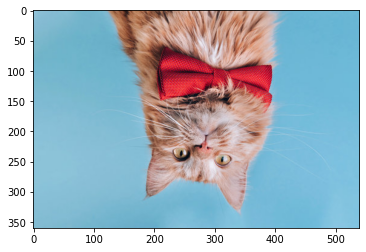

In [42]:
## inversion can be achieved via Slicing also

# simply invert all the rows
plt.imshow(img_cat[::-1, :, :])

- ### Cropping

In [55]:
img_cat.shape

(360, 540, 3)

`img_cat` has 360 pixels along rows (height of image), 540 pixels along columns (width of image), 3 channels (i.e. RGB layers).

<br>

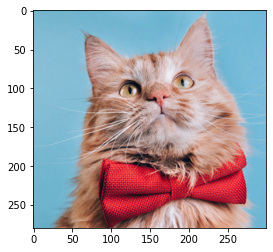

In [53]:
## crop the face & bow part

plt.imshow(img_cat[:300, 120:420, :])

- ### Contrast image

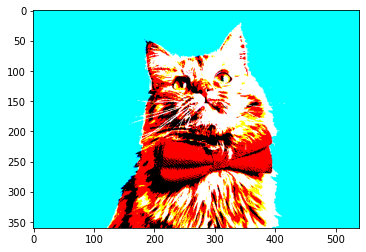

In [56]:
## If any value is greater than 150, then convert it to 250 otherwise to 0.

plt.imshow(np.where(img_cat > 150, 255, 0))

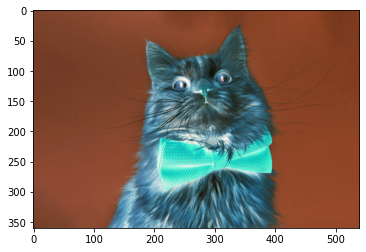

In [57]:
plt.imshow(255 - img_cat)